In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



# del X_train,X_test

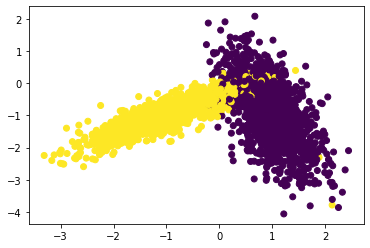

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

  # creating a dictionary of parameter within the given range which are uniformly distributed and unique. 
  params=random.sample(range(1,param_range),10)
  params.sort()
  params = {'n_neighbors':params}

  # group size is the size of each fold
  group_size = int(len(x_train)/folds)

  trainscores = []
  testscores  = [] 
  for i in params['n_neighbors']:

    trainscores_folds = []
    testscores_folds = []

    for j in range(0,folds):
      
      # finding indices for train and test
      test_indices = list(set(list(range((group_size*j),(group_size* (j+1))))))
      train_indices = list(set(list(range(1,len(x_train))))- set(test_indices))
      X_train = x_train[train_indices]
      Y_train = y_train[train_indices]
      X_test = x_train[test_indices]
      Y_test = y_train[test_indices]
      #print(len(X_train), len(Y_train), len(X_test), len(Y_test))

      classifier.n_neighbors = i
      classifier.fit(X_train, Y_train)
      # calculating the test accuracy and train accuracy. 
      Y_predicted = classifier.predict(X_test)
      testscores_folds.append(accuracy_score(Y_test, Y_predicted))
      Y_predicted = classifier.predict(X_train)
      trainscores_folds.append(accuracy_score(Y_train, Y_predicted))

    trainscores.append(np.mean(np.array(trainscores_folds)))
    testscores.append(np.mean(np.array(testscores_folds)))


  return trainscores,testscores, params


    
  




  

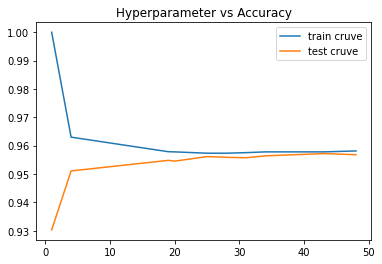

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
neigh = KNeighborsClassifier()

params = 50
folds = 3

trainscores, testscores, params =RandomSearchCV(X_train, y_train, neigh, params, folds)



plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyperparameter vs Accuracy')
plt.legend()
plt.show()







### Observations:-
  The best value of the hyperparameter can be observed at around 24. 

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X1,X2,y,clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X1.min()-1, X1.max()+1
    y_min, y_max = X2.min()-1, X2.max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    plt.scatter(X1, X2, c=y, cmap= cmap_bold)

    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("classification when k ="+str(clf.n_neighbors))
    plt.show()


### Plotting the decision boundary for the best value of K which is 24 in this case

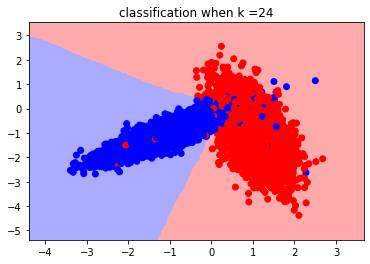

In [21]:
neigh = KNeighborsClassifier(n_neighbors=24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:,0], X_train[:, 1], y_train, neigh)

### References
https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=What%20is%20GridSearchCV%3F,parameters%20from%20the%20listed%20hyperparameters.

https://www.kaggle.com/

https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/